In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from scipy.stats import norm

## Problem 1 (6 Points)

1. Simulate 100,000 realizations from the binomial distribution with $N$=2500 trails and success probability $p$=0.45.

In [2]:
n, p = 2500, 0.45 # n=2500 trials, p=0.45 probability of success
s = npr.binomial(2500,0.45,[100000]) # result of 2500 Bernoulli trials with probability of success .45, tested 100,000 times

2. Compute the empirical mean and the empricial standard deviation of your sample and compare these values with the theoretical values.

In [3]:
x_bar = s.mean() # empirical mean
sdx = s.std() # empirical st. dev.
mu = n*p # theoretical mean
sigma = np.sqrt(n*p*(1-p)) # theoretical st. dev
print("Sample mean: ", x_bar, ", ", "Sample standard deviation: ", sdx)
print("Theoretical mean: ", mu, ", ", "Theoretical standard deviation ", sigma)

Sample mean:  1125.02757 ,  Sample standard deviation:  24.851101180734428
Theoretical mean:  1125.0 ,  Theoretical standard deviation  24.8746859276655


3. Plot a histogram of your sample with the absolute number of counts for each bin. Choose 50 bins.

(array([2.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 7.000e+00, 1.000e+01,
        1.400e+01, 2.400e+01, 5.500e+01, 1.030e+02, 2.150e+02, 2.360e+02,
        3.690e+02, 7.140e+02, 8.070e+02, 1.106e+03, 1.978e+03, 2.011e+03,
        2.572e+03, 3.116e+03, 4.862e+03, 4.553e+03, 5.070e+03, 7.189e+03,
        6.113e+03, 6.495e+03, 7.896e+03, 6.288e+03, 6.044e+03, 5.504e+03,
        6.253e+03, 4.171e+03, 3.629e+03, 3.643e+03, 2.358e+03, 1.867e+03,
        1.614e+03, 9.570e+02, 7.390e+02, 4.950e+02, 3.930e+02, 1.960e+02,
        1.150e+02, 1.040e+02, 4.500e+01, 2.400e+01, 2.200e+01, 1.100e+01,
        3.000e+00, 4.000e+00]),
 array([1012. , 1016.3, 1020.6, 1024.9, 1029.2, 1033.5, 1037.8, 1042.1,
        1046.4, 1050.7, 1055. , 1059.3, 1063.6, 1067.9, 1072.2, 1076.5,
        1080.8, 1085.1, 1089.4, 1093.7, 1098. , 1102.3, 1106.6, 1110.9,
        1115.2, 1119.5, 1123.8, 1128.1, 1132.4, 1136.7, 1141. , 1145.3,
        1149.6, 1153.9, 1158.2, 1162.5, 1166.8, 1171.1, 1175.4, 1179.7,
        1184. , 

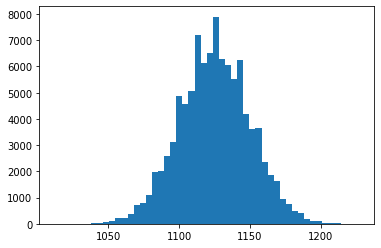

In [4]:
plt.hist(s,50,density=False) # plot histogram of total number of successes from 100000 simulations

4. Standardize your sample, that is, subtract the emprical mean and divide by the empricial standard deviation.

In [5]:
standard_s = np.array([(val-x_bar)/sdx for val in s]) # standardize sample by subtracting mean and dividing by st.dev.
standard_s # using separate list

array([-1.44973737,  0.28056825, -0.20230774, ..., -0.84614238,
        0.52200624, -0.48398539])

In [6]:
standard_x_bar = standard_s.mean() # get standardized mean
standard_sdx = standard_s.std() # get standardized st.dev

5. Plot a histogram of your standardized sample with the counts normalized to form a probability density. Choose again 50 bins. Compare your histrogram with the density of the standard normal distribution by inserting its density into the histogram plot. 

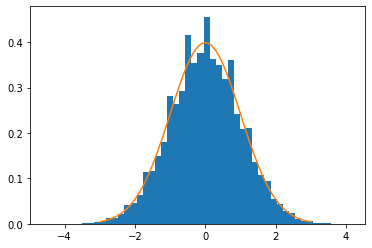

In [7]:
plt.hist(standard_s,50,density=True) # plot standardized sample histogram with counts normalized
x = np.linspace(standard_x_bar - 3*standard_sdx, standard_x_bar + 3*standard_sdx,100) # compare against standard normal distribution
plt.plot(x,norm.pdf(x,0,1))

## Problem 2 (4 Points)

1. Implement the simulation of a biased 6-sided die which takes the values 1,2,3,4,5,6 with probabilities 1/8,1/12,1/8,1/12,1/4,1/3.

In [8]:
event = [1,2,3,4,5,6] # all possible events
p_event = [1/8,1/12,1/8,1/12,1/4,1/3] # their respective probabilities
num_rolls = 1000000 # rolling biased die 100000 times

s = npr.choice(event,[num_rolls],p=p_event) # generate sample of size num_rolls
print(s)

[2 6 6 ... 6 4 6]


2. Plot a histrogramm with 1,000,000 simulations to check if the relative counts of each number is approximately equal to the corresponding specified probabilities.

_Remark:_ Specify the bins of your histogram correctly.

In [9]:
values,counts = np.unique(s,return_counts=True)
print(values)
print(counts/1000000) # empirical probabilities of each event approximately resemble theoretical

[1 2 3 4 5 6]
[0.124906 0.083135 0.125555 0.083099 0.24967  0.333635]


(array([124906.,  83135., 125555.,  83099., 249670., 333635.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

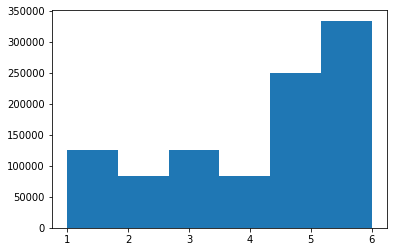

In [10]:
plt.hist(s,bins=6) # looks like relative counts corresponded to biased probabilities